In [5]:
# -------------------------------------
# --- Go to correct starting folder ---
# -------------------------------------
# (when running jupyter lab in the browser, the notebook starts with CWD = folder where it is located, which breaks imports, ...)
import os
import pathlib


while not ((cwd := pathlib.Path(os.getcwd())) / "pyproject.toml").exists():
    os.chdir(cwd.parent)  # go 1 folder up

# Docs
This notebook is aimed at validating of we can fit an exponentially increasing number of near-orthogonal vectors in a high-dimensional space.

In [6]:
# --- other imports ---
import math
import matplotlib.pyplot as plt

from blog.post_0013.find_max_n_vectors import find_max_n_vectors, do_vectors_fit
from shared.plotting.colors import CLR_BLUE, CLR_GREEN, CLR_GREY, CLR_RED
from shared.plotting import save_fig
from collections import defaultdict

In [7]:
# --- matplotlib ------------------------------------------
plt.rcParams["figure.dpi"] = 150

# --- settings --------------------------------------------
line_styles = ["-", "-", "-", "--", "--", "--", ":"]
line_colors = [CLR_BLUE, CLR_GREEN, CLR_RED, CLR_BLUE, CLR_GREEN, CLR_RED, CLR_BLUE]

In [8]:
# --- settings --------------------------------------------
n_dims_lst = [10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
# n_dims_lst = [10, 15, 20, 25]

results: dict[float, dict[int, int]] = defaultdict(dict)    # maps n_dims -> n_vectors

for n_dims in n_dims_lst:
    for epsilon in [0.05, 0.10, 0.15]:
        print("=" * 100)
        print(f"   {n_dims} DIMENSIONS - EPSILON {epsilon}")
        print("=" * 100)

        n_vectors = find_max_n_vectors(n_dims, epsilon=epsilon)

        print(f"  MAX VECTORS IN {n_dims} DIMS = {n_vectors}")
        print()

        results[epsilon][n_dims] = n_vectors


   10 DIMENSIONS - EPSILON 0.05
  MAX VECTORS IN 10 DIMS = 10

   10 DIMENSIONS - EPSILON 0.1
  MAX VECTORS IN 10 DIMS = 10

   10 DIMENSIONS - EPSILON 0.15
  MAX VECTORS IN 10 DIMS = 11

   15 DIMENSIONS - EPSILON 0.05
  MAX VECTORS IN 15 DIMS = 15

   15 DIMENSIONS - EPSILON 0.1
  MAX VECTORS IN 15 DIMS = 16

   15 DIMENSIONS - EPSILON 0.15
  MAX VECTORS IN 15 DIMS = 18

   20 DIMENSIONS - EPSILON 0.05
  MAX VECTORS IN 20 DIMS = 20

   20 DIMENSIONS - EPSILON 0.1
  MAX VECTORS IN 20 DIMS = 22

   20 DIMENSIONS - EPSILON 0.15
  MAX VECTORS IN 20 DIMS = 28

   25 DIMENSIONS - EPSILON 0.05
  MAX VECTORS IN 25 DIMS = 26

   25 DIMENSIONS - EPSILON 0.1
  MAX VECTORS IN 25 DIMS = 28

   25 DIMENSIONS - EPSILON 0.15
  MAX VECTORS IN 25 DIMS = 39

   30 DIMENSIONS - EPSILON 0.05
  MAX VECTORS IN 30 DIMS = 31

   30 DIMENSIONS - EPSILON 0.1
  MAX VECTORS IN 30 DIMS = 34

   30 DIMENSIONS - EPSILON 0.15
  MAX VECTORS IN 30 DIMS = 53

   35 DIMENSIONS - EPSILON 0.05
  MAX VECTORS IN 35 DIMS = 3

<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
/var/folders/wp/b7r0zy6d0pn2fhcx4s31n8640000gn/T/ipykernel_84114/1398306774.py:22: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(x_values, y_values, color=line_clr, linestyle='-', linewidth=1, marker='o', markersize=4, mec=line_clr, mfc=(1, 1, 1), label=f'max # vectors ($\epsilon={epsilon:.2f}$)')


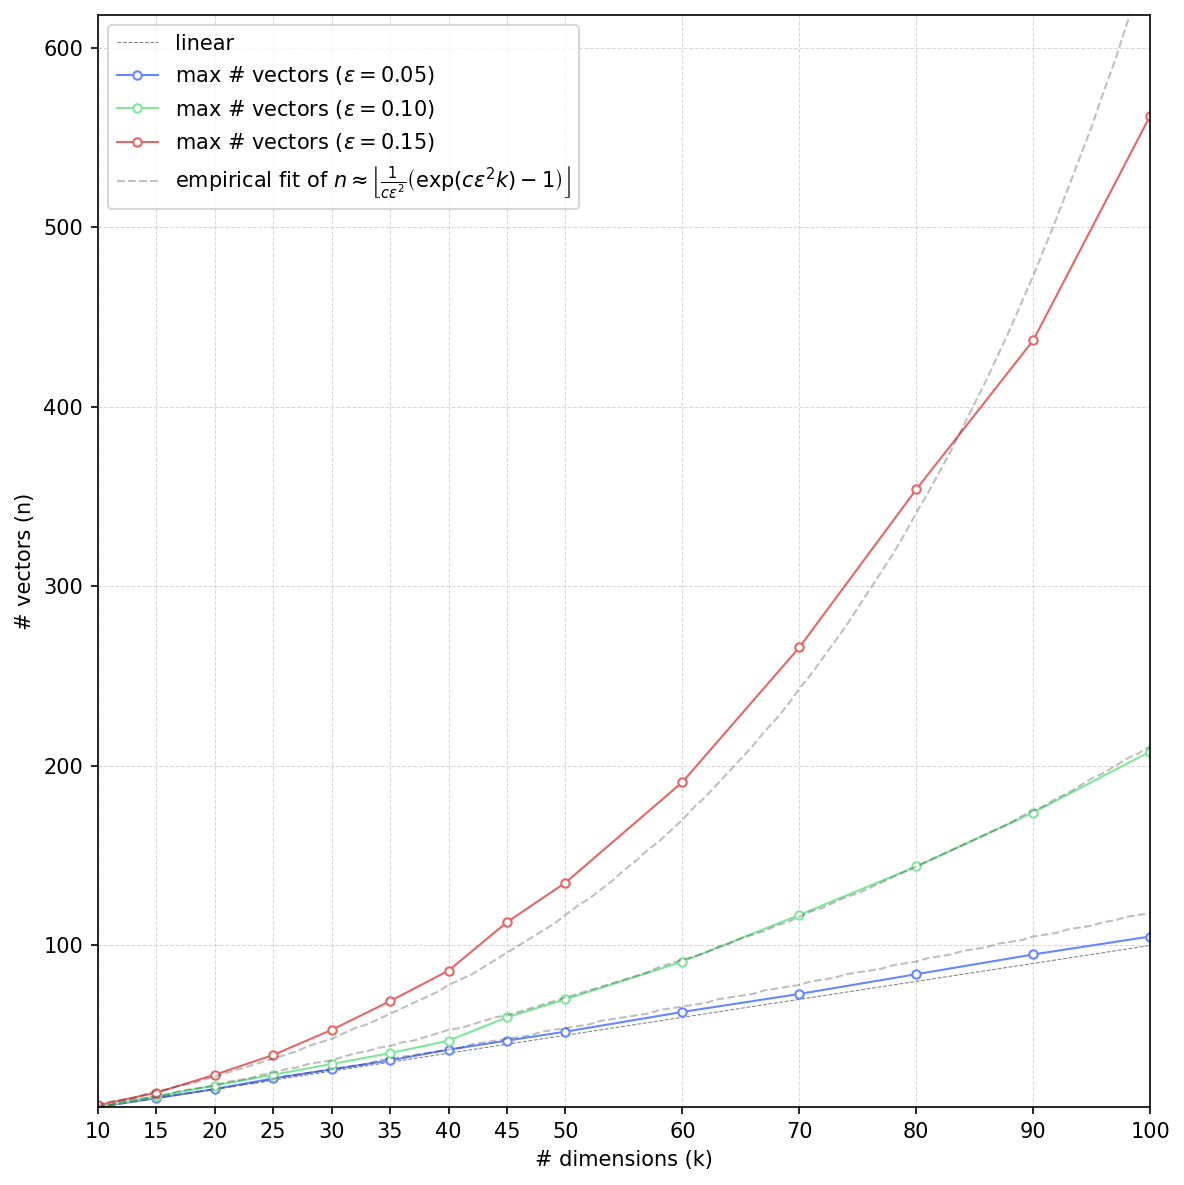

In [17]:
# --- empirical fit ---------------------------------------
import math
def estimate_n_vectors(_n_dims: int, _epsilon: float, _c: float) -> int:
    """
    Estimate the number of vectors that can be fit in n_dims dimensions with a given epsilon.
    """
    c_eps = _c * (_epsilon**2)
    return int((1/c_eps)*(math.exp(c_eps*_n_dims) - 1))



# --- plot ------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# diagonal
ax.plot([0, 1000], [0, 1000], color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=-1, label='linear')

# actual results
for line_clr, (epsilon, results_for_epsilon) in zip(line_colors, results.items()):
    x_values = list(results_for_epsilon.keys())     # n_dims
    y_values = list(results_for_epsilon.values())   # n_vectors
    ax.plot(x_values, y_values, color=line_clr, linestyle='-', linewidth=1, marker='o', markersize=4, mec=line_clr, mfc=(1, 1, 1), label=f'max # vectors ($\epsilon={epsilon:.2f}$)')

ax.set_xlim(min(x_values), max(x_values))
ax.set_ylim(min(x_values), 1.1*max(y_values))
ax.set_xticks(x_values)

# empirical fit
c = 1.35
for i, (epsilon, results_for_epsilon) in enumerate(results.items()):
    if i==0:
        label=r'empirical fit of $n \approx \left\lfloor \frac{1}{c \epsilon^2}\left( \exp(c \epsilon^2 k) - 1 \right) \right\rfloor$'
    else:
        label=None

    x_values = list(range(1, max(results_for_epsilon.keys())+1))
    y_values = [estimate_n_vectors(_n_dims=x, _epsilon=epsilon, _c=c) for x in x_values]

    ax.plot(x_values, y_values, color='k', alpha=0.25, linestyle='--', lw=1.0, label=label)


ax.legend(loc='upper left')
ax.set_xlabel('# dimensions (k)')
ax.set_ylabel('# vectors (n)')

ax.grid(True, alpha=0.5, lw=0.5, ls="--", zorder=-100)

fig.tight_layout()


# --- save ---------------------------------
save_fig(fig, post_nr=13, name="max_n_vectors_vs_n_dims")